In [1]:
import pandas as pd
import glob
import shutil
import sys
import numpy as np
from IPython.display import display, HTML
import matplotlib.pyplot as plt

In [2]:
file = 'data/train.csv'
df = pd.read_csv(file)

/data/anaconda/envs/py35/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Delete columns, where all the entries are 0.
df = df.loc[:, (df != 0).any(axis=0)]
print(df.shape)
df.info()

(8921483, 83)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8921483 entries, 0 to 8921482
Data columns (total 83 columns):
MachineIdentifier                                    object
ProductName                                          object
EngineVersion                                        object
AppVersion                                           object
AvSigVersion                                         object
IsBeta                                               int64
RtpStateBitfield                                     float64
IsSxsPassiveMode                                     int64
DefaultBrowsersIdentifier                            float64
AVProductStatesIdentifier                            float64
AVProductsInstalled                                  float64
AVProductsEnabled                                    float64
HasTpm                                               int64
CountryIdentifier                                    int64
CityIdentifier                  

<class 'pandas.core.series.Series'>
MachineIdentifier                                    0.000000
Census_MDC2FormFactor                                0.000000
Census_DeviceFamily                                  0.000000
Census_HasOpticalDiskDrive                           0.000000
Census_OSVersion                                     0.000000
Census_OSArchitecture                                0.000000
Census_OSBranch                                      0.000000
Census_OSBuildNumber                                 0.000000
Census_OSBuildRevision                               0.000000
Census_OSEdition                                     0.000000
AutoSampleOptIn                                      0.000000
Census_OSSkuName                                     0.000000
Census_OSUILocaleIdentifier                          0.000000
Census_OSWUAutoUpdateOptionsName                     0.000000
Census_IsPortableOperatingSystem                     0.000000
Census_GenuineStateName           

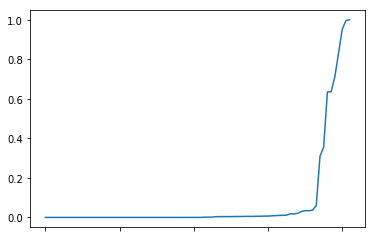

In [4]:
import matplotlib.pyplot as plt
# Percentage of nulls
print(type(df.isnull().sum()/df.shape[0]))
plt.figure()
# (df.isnull().sum()/df.shape[0]).plot.hist()
print((df.isnull().sum()/df.shape[0]).sort_values())
(df.isnull().sum()/df.shape[0]).sort_values().plot()
plt.show()

In [5]:
pd.set_option('max_colwidth',1000)

In [6]:
drop_list = []

import operator 
# Find all the NaN
# See what percentage of each column is NaN
x_pct = {}
length = len(df)
for y in df.columns:
    if df[y].isnull().sum() > 0:
        x_cnt = df[y].isnull().sum()
        x_pct[y] = 100.0*x_cnt/length
        
x_pct_list = sorted(x_pct.items(), key=operator.itemgetter(1), reverse=True)
      
# Print the features, where more than 80% of the data is NaN    
for f, val in x_pct_list:
    if val > 80:
        print(f, val)
        drop_list.append(f)
        print('Dropping: ' + f)
        print('------')

PuaMode 99.97411865269486
Dropping: PuaMode
------
Census_ProcessorClass 99.58940682843873
Dropping: Census_ProcessorClass
------
DefaultBrowsersIdentifier 95.14163732644
Dropping: DefaultBrowsersIdentifier
------
Census_IsFlightingInternal 83.04402978742435
Dropping: Census_IsFlightingInternal
------


In [7]:
# Drop MachineIdentifier
drop_list.append('MachineIdentifier')

In [9]:
# Remove columns with only 1 unique value
# Should do in the end also.
# TODO
# df.dropna(thresh=2)
for col in df:
    if(len(df.loc[:,col].unique()) == 1):
        print('Dropping: ' + col)
        drop_list.append(col)

In [10]:
# Now analyze one column at a time
start_cnt = 0
show_cnt = 5
print(df.iloc[:5,start_cnt:start_cnt+show_cnt])
for y in df.columns[start_cnt:start_cnt+show_cnt]:
    print(y, df[y].dtype)
start_cnt += show_cnt

                  MachineIdentifier   ProductName EngineVersion  \
0  0000028988387b115f69f31a3bf04f09  win8defender   1.1.15100.1   
1  000007535c3f730efa9ea0b7ef1bd645  win8defender   1.1.14600.4   
2  000007905a28d863f6d0d597892cd692  win8defender   1.1.15100.1   
3  00000b11598a75ea8ba1beea8459149f  win8defender   1.1.15100.1   
4  000014a5f00daa18e76b81417eeb99fc  win8defender   1.1.15100.1   

        AppVersion  AvSigVersion  
0  4.18.1807.18075  1.273.1735.0  
1     4.13.17134.1    1.263.48.0  
2  4.18.1807.18075  1.273.1341.0  
3  4.18.1807.18075  1.273.1527.0  
4  4.18.1807.18075  1.273.1379.0  
MachineIdentifier object
ProductName object
EngineVersion object
AppVersion object
AvSigVersion object


In [11]:
def break_and_get_part(value, position):
    return value.split(".")[position]

In [12]:
df['EngineVersion_0'] = df['EngineVersion'].apply(break_and_get_part, position=0)
df['EngineVersion_1'] = df['EngineVersion'].apply(break_and_get_part, position=1)
df['EngineVersion_2'] = df['EngineVersion'].apply(break_and_get_part, position=2)
df['EngineVersion_3'] = df['EngineVersion'].apply(break_and_get_part, position=3)

df['AppVersion_0'] = df['AppVersion'].apply(break_and_get_part, position=0)
df['AppVersion_1'] = df['AppVersion'].apply(break_and_get_part, position=1)
df['AppVersion_2'] = df['AppVersion'].apply(break_and_get_part, position=2)
df['AppVersion_3'] = df['AppVersion'].apply(break_and_get_part, position=3)

df['AvSigVersion_0'] = df['AvSigVersion'].apply(break_and_get_part, position=0)
df['AvSigVersion_1'] = df['AvSigVersion'].apply(break_and_get_part, position=1)
df['AvSigVersion_2'] = df['AvSigVersion'].apply(break_and_get_part, position=2)
df['AvSigVersion_3'] = df['AvSigVersion'].apply(break_and_get_part, position=3)

drop_list.append('EngineVersion')
drop_list.append('AppVersion')
drop_list.append('AvSigVersion')

In [13]:
print(df['EngineVersion_0'].unique())
print(df['EngineVersion_1'].unique())
print(df['EngineVersion_2'].unique())
print(df['EngineVersion_3'].unique())
print(df['AppVersion_0'].unique())
print(df['AppVersion_1'].unique())
print(df['AppVersion_2'].unique())
print(df['AppVersion_3'].unique())
print(df['AvSigVersion_0'].unique())
print(df['AvSigVersion_1'].unique())
print(df['AvSigVersion_2'].unique())
print(df['AvSigVersion_3'].unique())

['1']
['1']
['15100' '14600' '15200' '15300' '13504' '14800' '15000' '14104' '13804'
 '14306' '13407' '14405' '14901' '14700' '14202' '13303' '13701' '13000'
 '14500' '14003' '13601' '13903' '12805' '13202' '12902' '14305' '13704'
 '14002' '14103' '13103' '14303' '14201' '13102' '11701' '12400' '14001'
 '11804' '10401' '13902' '14102' '12603' '12706' '12002' '13803' '12101'
 '13406' '13802' '10302' '11400' '12804' '12300' '12205' '11903' '12505'
 '11502' '9700' '11602' '13503' '13301' '11202' '11104' '12802' '10701']
['1' '4' '6' '0' '3' '2' '5']
['4']
['18' '13' '9' '10' '8' '12' '14' '11' '16' '6' '4' '7' '17' '5' '15']
['1807' '17134' '218' '1806' '1809' '209' '10240' '16299' '17639' '10586'
 '14393' '15063' '17656' '17007' '17613' '207' '204' '205' '305' '304'
 '17677' '17661' '17643' '216' '17686' '17672' '17666' '17682' '17650'
 '306' '17685' '17634' '17655' '17627' '219' '203' '212' '17618' '17604']
['18075' '1' '0' '18062' '2' '17914' '228' '15' '18041' '494' '1593' '589'
 '163

In [16]:
# Now analyze the next 5 features
print(df.iloc[:5,start_cnt:start_cnt+show_cnt])
for y in df.columns[start_cnt:start_cnt+show_cnt]:
  print(y, df[y].dtype)
  print(df[y].unique())
start_cnt += show_cnt

   IsBeta  RtpStateBitfield  IsSxsPassiveMode  DefaultBrowsersIdentifier  \
0       0               7.0                 0                        NaN   
1       0               7.0                 0                        NaN   
2       0               7.0                 0                        NaN   
3       0               7.0                 0                        NaN   
4       0               7.0                 0                        NaN   

   AVProductStatesIdentifier  
0                    53447.0  
1                    53447.0  
2                    53447.0  
3                    53447.0  
4                    53447.0  
IsBeta int64
[0 1]
RtpStateBitfield float64
[ 7.  0. nan  3.  5.  8.  1. 35.]
IsSxsPassiveMode int64
[0 1]
DefaultBrowsersIdentifier float64
[  nan 1950.  146. ... 2327.  976. 1149.]
AVProductStatesIdentifier float64
[53447. 43927. 46413. ... 16684. 60602. 31745.]


In [18]:
# Now analyze the next 5 features
print(df.iloc[:5,start_cnt:start_cnt+show_cnt])
for y in df.columns[start_cnt:start_cnt+show_cnt]:
  print(y, df[y].dtype)
  print(df[y].unique())
start_cnt += show_cnt

   AVProductsInstalled  AVProductsEnabled  HasTpm  CountryIdentifier  \
0                  1.0                1.0       1                 29   
1                  1.0                1.0       1                 93   
2                  1.0                1.0       1                 86   
3                  1.0                1.0       1                 88   
4                  1.0                1.0       1                 18   

   CityIdentifier  
0        128035.0  
1          1482.0  
2        153579.0  
3         20710.0  
4         37376.0  
AVProductsInstalled float64
[ 1.  2.  3.  5. nan  4.  6.  7.  0.]
AVProductsEnabled float64
[ 1.  2.  0.  4. nan  3.  5.]
HasTpm int64
[1 0]
CountryIdentifier int64
[ 29  93  86  88  18  97  78 164 107  80 171 169 157 178 158  43 147  12
 203 205 199   9  68 201 141  35 159 160 129  44 207  15  89   3 108  55
 195 214 148 100  16 155 190  95  53 204  94   8 152 110 184 132 122  57
  39  51  59  70  52 121 149 142  41   2 179 180  27 103 167 10

In [19]:
# Now analyze the next 5 features
print(df.iloc[:5,start_cnt:start_cnt+show_cnt])
for y in df.columns[start_cnt:start_cnt+show_cnt]:
  print(y, df[y].dtype)
  print(df[y].unique())
start_cnt += show_cnt

   OrganizationIdentifier  GeoNameIdentifier  LocaleEnglishNameIdentifier  \
0                    18.0               35.0                          171   
1                    18.0              119.0                           64   
2                    18.0               64.0                           49   
3                     NaN              117.0                          115   
4                     NaN              277.0                           75   

    Platform Processor  
0  windows10       x64  
1  windows10       x64  
2  windows10       x64  
3  windows10       x64  
4  windows10       x64  
OrganizationIdentifier float64
[18. nan 27. 46. 11. 14. 37. 10. 50. 49. 33.  8. 48. 36. 31.  4.  1. 28.
  3. 52. 32. 51.  5.  2. 47. 44. 16. 40. 20. 22. 29. 26. 21. 39.  6. 19.
  7. 30. 42. 43. 41. 15. 45. 25. 35. 23. 38. 12. 17. 34.]
GeoNameIdentifier float64
[ 35. 119.  64. 117. 277. 126.  89. 205. 138. 101. 211. 209. 199. 230.
 202.  53. 187.  15. 255. 274. 266.  10. 276. 267. 240.

In [21]:
# Now analyze the next 5 features
print(df.iloc[:5,start_cnt:start_cnt+show_cnt])
for y in df.columns[start_cnt:start_cnt+show_cnt]:
  print(y, df[y].dtype)
  print(df[y].unique())
start_cnt += show_cnt

   OrganizationIdentifier  GeoNameIdentifier  LocaleEnglishNameIdentifier  \
0                    18.0               35.0                          171   
1                    18.0              119.0                           64   
2                    18.0               64.0                           49   
3                     NaN              117.0                          115   
4                     NaN              277.0                           75   

    Platform Processor  
0  windows10       x64  
1  windows10       x64  
2  windows10       x64  
3  windows10       x64  
4  windows10       x64  
OrganizationIdentifier float64
[18. nan 27. 46. 11. 14. 37. 10. 50. 49. 33.  8. 48. 36. 31.  4.  1. 28.
  3. 52. 32. 51.  5.  2. 47. 44. 16. 40. 20. 22. 29. 26. 21. 39.  6. 19.
  7. 30. 42. 43. 41. 15. 45. 25. 35. 23. 38. 12. 17. 34.]
GeoNameIdentifier float64
[ 35. 119.  64. 117. 277. 126.  89. 205. 138. 101. 211. 209. 199. 230.
 202.  53. 187.  15. 255. 274. 266.  10. 276. 267. 240.

In [22]:
# Now analyze the next 5 features
print(df.iloc[:5,start_cnt:start_cnt+show_cnt])
for y in df.columns[start_cnt:start_cnt+show_cnt]:
  print(y, df[y].dtype)
  print(df[y].unique())
# start_cnt += show_cnt

      OsVer  OsBuild  OsSuite OsPlatformSubRelease  \
0  10.0.0.0    17134      256                  rs4   
1  10.0.0.0    17134      256                  rs4   
2  10.0.0.0    17134      768                  rs4   
3  10.0.0.0    17134      256                  rs4   
4  10.0.0.0    17134      768                  rs4   

                                 OsBuildLab  
0  17134.1.amd64fre.rs4_release.180410-1804  
1  17134.1.amd64fre.rs4_release.180410-1804  
2  17134.1.amd64fre.rs4_release.180410-1804  
3  17134.1.amd64fre.rs4_release.180410-1804  
4  17134.1.amd64fre.rs4_release.180410-1804  
OsVer object
['10.0.0.0' '6.1.1.0' '6.3.0.0' '10.0.1.44' '6.1.0.0' '6.3.1.0' '6.1.3.0'
 '10.0.3.0' '10.0.1.0' '10.0.32.72' '10.0.2.0' '10.0.5.18' '10.0.0.1'
 '10.0.21.0' '6.3.3.0' '10.0.4.0' '10.0.80.0' '10.0.7.0' '10.0.5.0'
 '6.3.4.0' '10.0.32.0' '10.0.3.80' '10.0.2.86' '10.0.19.80' '10.0.16.36'
 '6.1.0.112' '10.0.5.117' '10.0.48.0' '6.3.16.0' '10.0.16.0' '10.0.1.144'
 '10.0.7.101' '6.1.7.0' '6.

In [31]:
def break_and_get_part_osbuildlab(value, position):
    if position < 4:
        print(value)
        return value.split(".")[position]
    elif position == 4:
        return value.split(".")[4].split('-')[0]
    elif position == 5:
        return value.split(".")[4].split('-')[1]

In [32]:
df['OsVer_0'] = df['OsVer'].apply(break_and_get_part, position=0)
df['OsVer_1'] = df['OsVer'].apply(break_and_get_part, position=1)
df['OsVer_2'] = df['OsVer'].apply(break_and_get_part, position=2)
df['OsVer_3'] = df['OsVer'].apply(break_and_get_part, position=3)
drop_list.append('OsVer')
print(df['OsVer_0'].unique())
print(df['OsVer_1'].unique())
print(df['OsVer_2'].unique())
print(df['OsVer_3'].unique())

['10' '6']
['0' '1' '3']
['0' '1' '3' '32' '2' '5' '21' '4' '80' '7' '19' '16' '48' '153' '8' '23'
 '6']
['0' '44' '72' '18' '1' '80' '86' '36' '112' '117' '144' '101' '128' '96'
 '22' '153' '16' '3' '2']


In [33]:
df['OsBuildLab_0'] = df['OsBuildLab'].apply(break_and_get_part_osbuildlab, position=0)
df['OsBuildLab_1'] = df['OsBuildLab'].apply(break_and_get_part_osbuildlab, position=1)
df['OsBuildLab_2'] = df['OsBuildLab'].apply(break_and_get_part_osbuildlab, position=2)
df['OsBuildLab_3'] = df['OsBuildLab'].apply(break_and_get_part_osbuildlab, position=3)
df['OsBuildLab_4'] = df['OsBuildLab'].apply(break_and_get_part_osbuildlab, position=4)
df['OsBuildLab_5'] = df['OsBuildLab'].apply(break_and_get_part_osbuildlab, position=5)
drop_list.append('OsBuildLab')
print(df['OsBuildLab_0'].unique())
print(df['OsBuildLab_1'].unique())
print(df['OsBuildLab_2'].unique())
print(df['OsBuildLab_3'].unique())
print(df['OsBuildLab_4'].unique())
print(df['OsBuildLab_5'].unique())

17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
14393.0.amd64fre.rs1_release.160715-1616
17134.1.amd64fre.rs4_release.180410-1804
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
17134.1.arm64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
7601.18409.amd64fre.win7sp1_gdr.140303-2144
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
17134.1.amd64fre.rs4_release.180410-1804
16299.15.amd64fre.rs3_release.170928-1534
9600.19067.x86fre.winblue_ltsb_escrow.180619-2033
10240.17914.amd64fre.th1.180627-1911
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_r

9600.19101.amd64fre.winblue_ltsb_escrow.180718-1800
14393.351.amd64fre.rs1_release_inmarket.161014-1755
17134.1.amd64fre.rs4_release.180410-1804
15063.0.amd64fre.rs2_release.170317-1834
9600.19101.amd64fre.winblue_ltsb_escrow.180718-1800
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
16299.15.amd64fre.rs3_release.170928-1534
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
17134.1.amd64fre.rs4_release.180410-1804
10240.17443.amd64fre.th1.170602-2340
15063.0.x86fre.rs2_release.170317-1834
10586.1176.amd64fre.th2_release_sec.170913-1848
16299.15.amd64fre.rs3_release.170928-1534
7601.24168.amd64fre.win7sp1_ldr.180608-0600
17134.1.amd64fre.rs4_release.180410-1804
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.1804

17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
17134.1.amd64fre.rs4_release.180410-1804
16299.15.amd64fre.rs3_release.170928-1534
16299.15.amd64fre.rs3_release.170928-1534
7601.24214.amd64fre.win7sp1_ldr_escrow.180801-1700
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
9600.19101.amd64fre.winblue_ltsb_escrow.180718-1800
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
16299.15.amd64fre.rs3_release.170928-1534
17134.1.amd64fre.rs4_release.180410-1804
16299.431.amd64fre.rs3_release_svc_

17134.1.amd64fre.rs4_release.180410-1804
10586.545.x86fre.th2_release.160802-1857
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
9600.19101.amd64fre.winblue_ltsb_escrow.180718-1800
14393.2485.x86fre.rs1_release.180827-1809
14393.1593.amd64fre.rs1_release.170731-1934
17134.1.x86fre.rs4_release.180410-1804
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
15063.0.amd64fre.rs2_release.170317-1834
14393.1944.amd64fre.rs1_release.171129-2100
16299.15.x86fre.rs3_release.170928-1534
14393.1944.amd64fre.rs1_release.171129-2100
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
16299.15.amd64fre.rs3_release.170928-1534
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
16299.15.amd64

15063.0.amd64fre.rs2_release.170317-1834
17134.1.x86fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
15063.0.amd64fre.rs2_release.170317-1834
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
17134.1.x86fre.rs4_release.180410-1804
15063.0.amd64fre.rs2_release.170317-1834
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
17134.1.x86fre.rs4_release.180410-1804
16299.15.amd64fre.rs3_release.170928-1534
17134.1.amd64fre.rs4_release.180410-1804
17134.1.x86fre.rs4_release.180410-1804
17134.1.x86fre.rs4_release.180410-1804
16299.15.amd64fre.rs3_release.170928-1534
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
10240.16384.amd64fre.th1.150709-1700
17134.1.amd64fre.rs4_release.180410-1804
14393.2189.amd64fre.rs1_release.180329-1711
15063.0.amd64fre.rs2_release.170317-1834

16299.15.amd64fre.rs3_release.170928-1534
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
17134.1.x86fre.rs4_release.180410-1804
10240.17443.amd64fre.th1.170602-2340
10586.1045.amd64fre.th2_release.170728-1941
17134.1.amd64fre.rs4_release.180410-1804
10586.589.amd64fre.th2_release.160906-1759
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
14393.2189.x86fre.rs1_release.180329-1711
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
17134.1.amd64fre.rs4_release.180410-1804
7601.24231.amd64fre.win7sp1_ldr.180810-0600
17134.1.amd64fre.rs4_release.180410-1804
16299.15.amd64fre.rs3_release.170928-1534
17134.1.amd64fre.rs4_release.180410-1804
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
17134.1.amd64fre.rs4_relea

15063.0.amd64fre.rs2_release.170317-1834
14393.2189.amd64fre.rs1_release.180329-1711
16299.15.x86fre.rs3_release.170928-1534
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
10240.17443.amd64fre.th1.170602-2340
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
17134.1.amd64fre.rs4_release.180410-1804
16299.637.amd64fre.rs3_release_svc.180808-1748
17134.1.amd64fre.rs4_release.180410-1804
16299.15.amd64fre.rs3_release.170928-1534
15063.0.x86fre.rs2_release.170317-1834
16299.15.amd64fre.rs3_release.170928-1534
16299.15.amd64fre.rs3_release.170928-1534
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
10586.3.x86fre.th2_release_sec.151104-1948
15063.0.amd64fre.rs2_release.170317-1834
17134.1.x86fre.rs4_release.180410-1804
16299.15.amd64fre.rs3_release.170928-1534
15063.0.amd64fre.rs2_release.170317-1834
16299.431.amd64fre.rs3_re

17134.1.amd64fre.rs4_release.180410-1804
15063.0.amd64fre.rs2_release.170317-1834
10240.17443.amd64fre.th1.170602-2340
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
17134.1.x86fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
16299.15.amd64fre.rs3_release.170928-1534
10240.17443.amd64fre.th1.170602-2340
17134.1.amd64fre.rs4_release.180410-1804
15063.0.amd64fre.rs2_release.170317-1834
16299.15.amd64fre.rs3_release.170928-1534
17134.1.amd64fre.rs4_release.180410-1804
16299.15.x86fre.rs3_release.170928-1534
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
16299.15.amd64fre.rs3_relea

10240.17443.amd64fre.th1.170602-2340
17134.1.amd64fre.rs4_release.180410-1804
15063.0.x86fre.rs2_release.170317-1834
14393.693.amd64fre.rs1_release.161220-1747
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
14393.1593.amd64fre.rs1_release.170731-1934
14393.321.x86fre.rs1_release_inmarket.161004-2338
17134.1.amd64fre.rs4_release.180410-1804
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
17134.1.amd64fre.rs4_release.180410-1804
15063.0.amd64fre.rs2_release.170317-1834
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
16299.15.amd64fre.rs3_release.170928-1534
14393.2007.amd64fre.rs1_release.171231-1800
14393.2125.x86fre.rs1_release.180301-2139
16299.15.amd64fre.rs3_release.170928-1534
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
16299.15.amd64fre.rs3_release.170928-1534
16299.15.amd64fre.rs3_release.170928-1534
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fr

10240.17443.amd64fre.th1.170602-2340
16299.15.x86fre.rs3_release.170928-1534
14393.1770.amd64fre.rs1_release.170917-1700
17134.1.amd64fre.rs4_release.180410-1804
9600.19101.amd64fre.winblue_ltsb_escrow.180718-1800
10240.17443.amd64fre.th1.170602-2340
17134.1.x86fre.rs4_release.180410-1804
16299.15.amd64fre.rs3_release.170928-1534
14393.2189.amd64fre.rs1_release.180329-1711
17134.1.amd64fre.rs4_release.180410-1804
10240.17443.amd64fre.th1.170602-2340
14393.1480.amd64fre.rs1_release.170706-2004
14393.693.amd64fre.rs1_release.161220-1747
17134.1.amd64fre.rs4_release.180410-1804
14393.2214.x86fre.rs1_release_1.180402-1758
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
16299.15.amd64fre.rs3_release.170928-1534
15063.0.amd64fre.rs2_release.170317-1834
17134.1.amd64fre.rs4_release.180410-1804
10586.672.amd64fre.th2_release_sec.161024-1825
16299.15.amd64fre.rs3_release.170928-1534
17134.1.amd64fre.rs4_release.180410-1804
10240.17443.x86fre.th1.170602-2340
17134.1.amd64fre.rs4_release.18

17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
14393.0.amd64fre.rs1_release.160715-1616
14393.693.amd64fre.rs1_release.161220-1747
15063.0.amd64fre.rs2_release.170317-1834
16299.15.amd64fre.rs3_release.170928-1534
15063.0.amd64fre.rs2_release.170317-1834
16299.15.amd64fre.rs3_release.170928-1534
17134.1.amd64fre.rs4_release.180410-1804
16299.15.amd64fre.rs3_release.170928-1534
15063.0.amd64fre.rs2_release.170317-1834
14393.187.amd64fre.rs1_release_inmarket.160906-1818
10586.0.amd64fre.th2_release.151029-1700
17134.1.amd64fre.rs4_release.180410-1804
10586.0.amd64fre.th2_release.151029-1700
16299.15.x86fre.rs3_release.170928-1534
15063.0.amd64fre.rs2_release.170317-1834
14393.0.amd64fre.rs1_release.160715-1616
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
15063.0.amd64fre.rs2_release.170317-1834
15063.0.amd64fre.rs2_release.170317-1834
14393.693.amd64fre.rs1_releas

16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
17134.1.amd64fre.rs4_release.180410-1804
14393.693.amd64fre.rs1_release.161220-1747
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
16299.15.amd64fre.rs3_release.170928-1534
17134.1.amd64fre.rs4_release.180410-1804
7601.23418.amd64fre.win7sp1_ldr.160408-2045
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
10586.1176.amd64fre.th2_release_sec.170913-1848
16299.15.x86fre.rs3_release.170928-1534
17134.1.x86fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
14393.1770.amd64fre.rs1_release.170917-1700
16299.15.amd64fre.rs3_release.170928-1534
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
1713

17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
14393.2189.amd64fre.rs1_release.180329-1711
16299.15.x86fre.rs3_release.170928-1534
17134.1.amd64fre.rs4_release.180410-1804
16299.15.amd64fre.rs3_release.170928-1534
16299.15.amd64fre.rs3_release.170928-1534
15063.0.amd64fre.rs2_release.170317-1834
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
16299.15.amd64fre.rs3_release.170928-1534
16299.15.amd64fre.rs3_release.170928-1534
16299.431.amd6

17134.1.amd64fre.rs4_release.180410-1804
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
16299.15.amd64fre.rs3_release.170928-1534
16299.15.amd64fre.rs3_release.170928-1534
15063.0.amd64fre.rs2_release.170317-1834
17134.1.amd64fre.rs4_release.180410-1804
16299.15.x86fre.rs3_release.170928-1534
16299.15.amd64fre.rs3_release.170928-1534
16299.15.amd64fre.rs3_release.170928-1534
17134.1.amd64fre.rs4_release.180410-1804
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
15063.0.x86fre.rs2_release.170317-1834
17134.1.amd64fre.rs4_release.180410-1804
10586.420.amd64fre.th2_release_sec.160527-1834
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
15063.0.amd64fre.rs2_release.170317-1834
17134.1.amd64fre.rs4_release.180410-1804
16299.15.amd64fre.rs3_release.170928-1534
14393.0.amd64fre.rs1_release.160715-1616
14393.2189.amd64fre.rs1_release.180329-1711
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4

16299.15.amd64fre.rs3_release.170928-1534
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
16299.637.amd64fre.rs3_release_svc.180808-1748
17134.1.amd64fre.rs4_release.180410-1804
10586.1176.amd64fre.th2_release_sec.170913-1848
17134.1.amd64fre.rs4_release.180410-1804
16299.15.amd64fre.rs3_release.170928-1534
17134.1.amd64fre.rs4_release.180410-1804
16299.15.amd64fre.rs3_release.170928-1534
9600.19067.amd64fre.winblue_ltsb_escrow.180619-2033
17134.1.amd64fre.rs4_release.180410-1804
15063.0.amd64fre.rs2_release.170317-1834
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
16299.15.amd64fre.rs3_release.170928-1534
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
17134.1.amd64fre.rs4_release.18

14393.2189.amd64fre.rs1_release.180329-1711
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
17134.1.amd64fre.rs4_release.180410-1804
9600.19067.amd64fre.winblue_ltsb_escrow.180619-2033
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
17134.1.amd64fre.rs4_release.180410-1804
14393.2189.x86fre.rs1_release.180329-1711
17134.1.amd64fre.rs4_release.180410-1804
16299.15.amd64fre.rs3_release.170928-1534
15063.0.amd64fre.rs2_release.170317-1834
17134.1.amd64fre.rs4_release.180410-1804
17134.1.x86fre.rs4_release.180410-1804
14393.2189.amd64fre.rs1_release.180329-1711
17134.1.amd64fre.rs4_release.180410-1804
17741.1000.amd64fre.rs5_release.180814-1430
17134.1.amd64fre.rs4_release.180410-1804
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
17134.1.amd64fre.rs4_relea

17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
15063.0.amd64fre.rs2_release.170317-1834
17134.1.amd64fre.rs4_release.180410-1804
16299.15.amd64fre.rs3_release.170928-1534
16299.15.amd64fre.rs3_release.170928-1534
17134.1.amd64fre.rs4_release.180410-1804
16299.15.amd64fre.rs3_release.170928-1534
14393.2214.x86fre.rs1_release_1.180402-1758
15063.0.amd64fre.rs2_release.170317-1834
17134.1.amd64fre.rs4_release.180410-1804
15063.0.amd64fre.rs2_release.170317-1834
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
16299.15.x86fre.rs3_release.170928-1534
16299.15.x86fre.rs3_release.170928-1534
17134.1.amd64fre.rs4_release.180410-1804
15063.0.amd64fre.rs2_release.170317-1834
14393.2007.amd64fre.rs1_rel

16299.637.amd64fre.rs3_release_svc.180808-1748
10586.494.x86fre.th2_release_sec.160630-1736
17134.1.amd64fre.rs4_release.180410-1804
9600.19035.amd64fre.winblue_ltsb_escrow.180522-1700
16299.15.amd64fre.rs3_release.170928-1534
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
10240.17443.amd64fre.th1.170602-2340
15063.0.amd64fre.rs2_release.170317-1834
17134.1.amd64fre.rs4_release.180410-1804
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
17134.1.amd64fre.rs4_release.180410-1804
15063.0.amd64fre.rs2_release.170317-1834
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
15063.0.amd64fre.rs2_release.170317-1834
7601.24168.amd64fre.win7sp1_ldr.180608-0600
17134.1.amd64fre.rs4_release.180410-1804
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
17134.1.amd64fre.rs4_release.180410-1804
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
17134.1.amd64fre.rs4_release.180410-18

16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
16299.15.amd64fre.rs3_release.170928-1534
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
15063.0.amd64fre.rs2_release.170317-1834
15063.0.amd64fre.rs2_release.170317-1834
10240.17443.amd64fre.th1.170602-2340
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
9600.18758.amd64fre.winblue_ltsb.170707-0600
17134.1.amd64fre.rs4_release.180410-1804
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
17134.1.amd64fre.rs4_release.180410-1804
10586.0.amd64fre.th2_release.151029-1700
17134.1.amd64fre.rs4_release.180410-1804
15063.0.amd64fre.rs2_release.170317-1834
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
17134.1.amd64fre.rs4_release.18041

14393.1593.amd64fre.rs1_release.170731-1934
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
16299.15.amd64fre.rs3_release.170928-1534
17134.1.amd64fre.rs4_release.180410-1804
10586.0.amd64fre.th2_release.151029-1700
14393.2068.x86fre.rs1_release.180209-1727
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
17134.1.amd64fre.rs4_release.180410-1804
16299.15.amd64fre.rs3_release.170928-1534
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
14393.2189.amd64fre.rs1_release.180329-1711
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
15063.0.x86fre.rs2_release.170317-1834
16299.637.amd64fre.rs3_release_svc.180808-1748
14393.1480.x86fre.rs1_release.170706-2004
16299.15.amd64fre.rs3_release.170928-1534
16299.431.amd64f

17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
17134.1.x86fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
17134.1.amd64fre.rs4_release.180410-1804
7601.24168.amd64fre.win7sp1_ldr.180608-0600
17134.1.amd64fre.rs4_release.180410-1804
9600.19067.amd64fre.winblue_ltsb_escrow.180619-2033
17134.1.amd64fre.rs4_release.180410-1804
16299.15.x86fre.rs3_release.170928-1534
16299.15.amd64fre.rs3_release.170928-1534
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
16299.15.x86fre.rs3_release.170928-1534
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
17134.1.amd64fre.rs4_release.180410-1804
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
17134.1.amd64fre.rs4_release.180410

16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
14393.2189.x86fre.rs1_release.180329-1711
14393.1944.x86fre.rs1_release.171129-2100
17134.1.amd64fre.rs4_release.180410-1804
10240.17443.amd64fre.th1.170602-2340
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
16299.15.amd64fre.rs3_release.170928-1534
15063.0.amd64fre.rs2_release.170317-1834
15063.0.amd64fre.rs2_release.170317-1834
17134.1.amd64fre.rs4_release.180410-1804
16299.15.x86fre.rs3_release.170928-1534
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
14393.321.amd64fre.rs1_release_inmarket.161004-2338
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
14393.0.amd64fre.rs1_release.160715-1616
10586.1176.amd64fre.th2_release_sec.170913-1848
15063.0.amd64fre.rs2_release.170317-1834
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
17134.1.amd64fre.rs4_release.180410-1804
14

14393.1593.amd64fre.rs1_release.170731-1934
15063.0.amd64fre.rs2_release.170317-1834
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
15063.0.amd64fre.rs2_release.170317-1834
17134.1.amd64fre.rs4_release.180410-1804
17134.1.x86fre.rs4_release.180410-1804
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
10586.633.amd64fre.th2_release.161004-1602
15063.0.amd64fre.rs2_release.170317-1834
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
10240.17443.amd64fre.th1.170602-2340
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
15063.0.amd64fre.rs2_release.170317-1834
17134.1.amd64fre.rs4_release.180410-1804
15063.0.amd64fre.rs2_release.170317-1834
17134.1.amd64fre.rs4_release.180410-1804
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
14393.2189.amd64fre.rs1_release.180329-1711
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
14393.2189.amd64fre.rs1_release.180329-1711
10240.17443.a

17134.1.amd64fre.rs4_release.180410-1804
14393.2189.amd64fre.rs1_release.180329-1711
14393.2068.amd64fre.rs1_release.180209-1727
9600.18821.amd64fre.winblue_ltsb.170914-0600
17134.1.amd64fre.rs4_release.180410-1804
10586.1176.x86fre.th2_release_sec.170913-1848
14393.1480.amd64fre.rs1_release.170706-2004
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
15063.0.amd64fre.rs2_release.170317-1834
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
15063.0.amd64fre.rs2_release.170317-1834
10240.16463.x86fre.th1.150819-1946
16299.15.x86fre.rs3_release.170928-1534
17134.1.x86fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
16299.15.amd64fre.rs3_release.170928-1534
16299.15.amd64fre.rs3_release.170928-1534
10240.17443.amd64fre.th1.170602-2340
16299.15.amd64fre.rs3_release.170928-1534
17134.1.x86fre.rs4_release.180410-1804
16299.431.amd64fre.rs3_release_svc_escrow.180502-19

14393.2189.amd64fre.rs1_release.180329-1711
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
16299.15.amd64fre.rs3_release.170928-1534
7601.24117.x86fre.win7sp1_ldr_escrow.180422-1430
17134.1.amd64fre.rs4_release.180410-1804
16299.15.x86fre.rs3_release.170928-1534
17134.1.amd64fre.rs4_release.180410-1804
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
17134.1.x86fre.rs4_release.180410-1804
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
17134.1.x86fre.rs4_release.180410-1804
16299.15.amd64fre.rs3_release.170928-1534
16299.15.amd64fre.rs3_release.170928-1534
16299.15.amd64fre.rs3_release.170928-1534
17134.1.amd64fre.rs4_release.180410-1804
15063.0.amd64fre.rs2_release.170317-1834
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
17754.1.x86fre.rs5_release.180831-1429
7601.24214.amd64fre.win7sp1_ldr_escrow

16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
17134.1.amd64fre.rs4_release.180410-1804
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
9600.19101.amd64fre.winblue_ltsb_escrow.180718-1800
17134.1.amd64fre.rs4_release.180410-1804
16299.15.amd64fre.rs3_release.170928-1534
16299.15.amd64fre.rs3_release.170928-1534
14393.1480.amd64fre.rs1_release.170706-2004
15063.0.amd64fre.rs2_release.170317-1834
10586.1176.amd64fre.th2_release_sec.170913-1848
10240.17443.amd64fre.th1.170602-2340
16299.15.x86fre.rs3_release.170928-1534
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
16299.15.amd64fre.rs3_release.170928-1534
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
16299.15.amd64fre.rs3_release.170928-1534
17134.1.amd64fre.rs4_relea

15063.0.amd64fre.rs2_release.170317-1834
15063.0.amd64fre.rs2_release.170317-1834
16299.15.amd64fre.rs3_release.170928-1534
17134.1.x86fre.rs4_release.180410-1804
10586.103.amd64fre.th2_release.160126-1819
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
17134.1.x86fre.rs4_release.180410-1804
10586.1176.amd64fre.th2_release_sec.170913-1848
17134.1.amd64fre.rs4_release.180410-1804
15063.0.amd64fre.rs2_release.170317-1834
15063.0.amd64fre.rs2_release.170317-1834
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
10586.1176.amd64fre.th2_release_sec.170913-1848
17134.1.amd64fre.rs4_release.180410-1804
14393.2189.amd64fre.rs1_release.180329-1711
14393.953.amd64fre.rs1_release_inmarket.170303-1614
10586.1176.x86fre.th2_release_sec.170913-1848
16299.15.amd64fre.rs3_release.170928-1534
15063.0.amd64fre.rs2_release.170317-1834
16299.15.amd64fre.rs3_release.170928-1534
17134.1.amd64fre.rs4_release.180410-1804
14393.2189.amd64fre.rs1_release.180329-1711
17134.1

14393.0.amd64fre.rs1_release.160715-1616
16299.15.amd64fre.rs3_release.170928-1534
16299.15.amd64fre.rs3_release.170928-1534
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
15063.0.amd64fre.rs2_release.170317-1834
17134.1.amd64fre.rs4_release.180410-1804
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
16299.15.amd64fre.rs3_release.170928-1534
10586.1106.x86fre.th2_release.170904-1742
15063.0.amd64fre.rs2_release.170317-1834
17134.1.x86fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
14393.206.amd64fre.rs1_release.160915-0644
17134.1.amd64fre.rs4_release.180410-1804
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
17134.1.amd64fre.rs4_release.180410-1804
7601.24168.amd64fre.win7sp1_ldr.180608-0600
15063.0.amd64fre.rs2_release.170317-1834
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
14393.1593.amd64fre.rs1_release.170731-1934
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
17134.1.

16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
17134.1.amd64fre.rs4_release.180410-1804
16299.15.x86fre.rs3_release.170928-1534
10240.17443.amd64fre.th1.170602-2340
16299.15.amd64fre.rs3_release.170928-1534
14393.2214.amd64fre.rs1_release_1.180402-1758
16299.15.amd64fre.rs3_release.170928-1534
9600.19125.amd64fre.winblue_ltsb.180812-0703
15063.0.amd64fre.rs2_release.170317-1834
15063.0.amd64fre.rs2_release.170317-1834
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
16299.637.amd64fre.rs3_release_svc.180808-1748
17134.1.x86fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
16299.15.x86fre.rs3_release.170928-1534
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
10240.17709.amd64fre.th1.171130-0900
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
17134.1.amd64

16299.15.x86fre.rs3_release.170928-1534
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
17134.1.amd64fre.rs4_release.180410-1804
10586.0.amd64fre.th2_release.151029-1700
17134.1.amd64fre.rs4_release.180410-1804
16299.15.amd64fre.rs3_release.170928-1534
16299.15.x86fre.rs3_release.170928-1534
15063.0.amd64fre.rs2_release.170317-1834
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
10586.1176.amd64fre.th2_release_sec.170913-1848
17134.1.amd64fre.rs4_release.180410-1804
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
17134.1.amd64fre.rs4_release.180410-1804
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
16299.637.amd64fre.rs3_release_svc.180808-1748
10586.1176.amd64fre.th2_release_sec.170913-1848
10586.1176.amd64fre.th2_release_sec.170913-1848
17134.1.amd64fre.rs4

16299.15.amd64fre.rs3_release.170928-1534
17134.1.amd64fre.rs4_release.180410-1804
10586.17.amd64fre.th2_release.151121-2308
15063.0.amd64fre.rs2_release.170317-1834
14393.1593.amd64fre.rs1_release.170731-1934
15063.0.amd64fre.rs2_release.170317-1834
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
14393.0.amd64fre.rs1_release.160715-1616
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
15063.0.amd64fre.rs2_release.170317-1834
15063.0.amd64fre.rs2_release.170317-1834
15063.0.amd64fre.rs2_release.170317-1834
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64

17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
16299.15.amd64fre.rs3_release.170928-1534
17134.1.amd64fre.rs4_release.180410-1804
15063.0.amd64fre.rs2_release.170317-1834
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
17134.1.x86fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
16299.15.x86fre.rs3_release.170928-1534
14393.1198.amd64fre.rs1_release_sec.170427-1353
17134.1.amd64fre.rs4_release.180410-1804
17134.1.x86fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908


17134.1.amd64fre.rs4_release.180410-1804
10586.672.amd64fre.th2_release_sec.161024-1825
17134.1.amd64fre.rs4_release.180410-1804
16299.15.x86fre.rs3_release.170928-1534
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
15063.0.amd64fre.rs2_release.170317-1834
16299.15.amd64fre.rs3_release.170928-1534
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
16299.15.amd64fre.rs3_release.170928-1534
15063.0.amd64fre.rs2_release.170317-1834
17134.1.amd64fre.rs4_release.180410-1804
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
14393.2189.amd64fre.rs1_release.180329-1711
17134.1.amd64fre.rs4_release.180410-1804
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
17134.1.amd64fre.rs4_release.180410-1804
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
16299.431.amd64fre.rs3_

17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
15063.0.amd64fre.rs2_release.170317-1834
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
9600.19125.amd64fre.winblue_ltsb.180812-0703
9600.19067.amd64fre.winblue_ltsb_escrow.180619-2033
14393.2007.amd64fre.rs1_release.171231-1800
7601.24214.amd64fre.win7sp1_ldr_escrow.180801-1700
14393.0.amd64fre.rs1_release.160715-1616
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
16299.15.x86fre.rs3_release.170928-1534
17134.1.amd64fre.rs4_release.180410-1804
17134.1.x86fre.rs4_release.180410-1804
9600.19101.amd64fre.winblue_ltsb_escrow.180718-1800
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
17134.1.

17134.1.amd64fre.rs4_release.180410-1804
15063.0.amd64fre.rs2_release.170317-1834
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
15063.0.amd64fre.rs2_release.170317-1834
17134.1.amd64fre.rs4_release.180410-1804
9600.19067.amd64fre.winblue_ltsb_escrow.180619-2033
17134.1.x86fre.rs4_release.180410-1804
10586.1007.amd64fre.th2_release.170706-2002
17134.1.amd64fre.rs4_release.180410-1804
17134.1.x86fre.rs4_release.180410-1804
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
16299.15.x86fre.rs3_release.170928-1534
14393.1770.amd64fre.rs1_release.170917-1700
17134.1.amd64fre.rs4_release.180410-1804
10240.17443.amd64fre.th1.170602-2340
17134.1.amd64fre.rs4_release.180410-1804
16299.15.amd64fre.rs3_release.170928-1534
17134.1.x86fre.rs4_release.180410-1804
15063.0.amd64fre.rs2_release.170317-1834
14393.2189.amd64fre.rs1_release.180329-1711
17134.1.amd64fre.rs4_release.180410-1804
14393.2189.amd64fre.rs1_release.180329-1711
16299

17134.1.x86fre.rs4_release.180410-1804
14393.2007.amd64fre.rs1_release.171231-1800
17134.1.amd64fre.rs4_release.180410-1804
16299.15.x86fre.rs3_release.170928-1534
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
10586.1176.amd64fre.th2_release_sec.170913-1848
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
10240.17443.amd64fre.th1.170602-2340
10240.17443.amd64fre.th1.170602-2340
17134.1.amd64fre.rs4_release.180410-1804
14393.1770.amd64fre.rs1_release.170917-1700
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
16299.15.x86fre.rs3_release.1

17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
15063.0.amd64fre.rs2_release.170317-1834
17134.1.x86fre.rs4_release.180410-1804
15063.0.amd64fre.rs2_release.170317-1834
16299.15.amd64fre.rs3_release.170928-1534
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
16299.15.amd64fre.rs3_release.170928-1534
7601.24168.x86fre.win7sp1_ldr.180608-0600
17134.1.amd64fre.rs4_release.180410-1804
10240.17443.amd64fre.th1.170602-2340
15063.0.amd64fre.rs2_release.170317-1834
10586.1176.x86fre.th2_release_sec.170913-1848
15063.0.amd64fre.rs2_release.170317-1834
15063.0.amd64fre.rs2_release.170317-1834
17134.1.x86fre.r

15063.0.amd64fre.rs2_release.170317-1834
16299.15.x86fre.rs3_release.170928-1534
16299.15.amd64fre.rs3_release.170928-1534
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
16299.15.amd64fre.rs3_release.170928-1534
15063.0.amd64fre.rs2_release.170317-1834
10240.17443.x86fre.th1.170602-2340
10586.1176.amd64fre.th2_release_sec.170913-1848
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
17134.1.x86fre.rs4_release.180410-1804
17134.1.x86fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
17134.1.amd64fre.rs4_release.180410-1804
16299.637.amd64fre.rs3_release_svc.180808-1748
17134.1.amd64fre.rs4_release.180410-1804
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
14393.2189.amd64fre.rs1_release.180329-1711
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908
17134.1.amd64fre.rs4_release.180410-1804
14393.351.amd64fre.rs1_rel

AttributeError: 'float' object has no attribute 'split'